In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


# Load the data

df = pd.read_csv('../data/togo-dapaong_qc.csv')

print(df.head())
# Display summary statistics for numeric columns

summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
Summary Statistics:


**#Missing-Value Report**


In [3]:
# --- Missing-Value Report ---
missing_values = df.isna().sum()
missing_values_percentage = (missing_values / len(df)) * 100

print("\nMissing Values (Count):")
print(missing_values)

print("\nMissing Values (%):")
print(missing_values_percentage)


Missing Values (Count):
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Missing Values (%):
Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64


In [4]:
# Columns with >5% missing values
high_missing_cols = missing_values_percentage[missing_values_percentage > 5]
if not high_missing_cols.empty:
    print("\nColumns with >5% missing values:")
    print(high_missing_cols)
else:
    print("\nNo columns have >5% missing values.")


Columns with >5% missing values:
Comments    100.0
dtype: float64


Outlier Detection & Data Cleaning Report
This analysis focuses on identifying and handling missing values, incorrect entries, and outliers in key columns:

Solar Irradiance: GHI, DNI, DHI

Module Temperatures: ModA, ModB

Wind Speed: WS, WSgust

In [5]:
#1. Missing Values Check
missing_values = df.isna().sum()
print("Missing Values per Column:")
print(missing_values)
df.drop(columns=['Comments'], inplace=True)

Missing Values per Column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


2. Handling Negative Irradiance Values


In [6]:
irradiance_cols = ['GHI', 'DNI', 'DHI']
df[irradiance_cols] = df[irradiance_cols].clip(lower=0)

3. Outlier Detection (Z-Score Method)


In [7]:
from scipy import stats
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = stats.zscore(df[numeric_cols])
outliers = (np.abs(z_scores) > 3).any(axis=1)
print(f"Found {outliers.sum()} outliers (|Z| > 3)")
for col in numeric_cols:
    df.loc[outliers, col] = df[col].median()

Found 9257 outliers (|Z| > 3)


4. Wind Speed Data Validation


In [8]:
# Check for WSgust < WS (physically unlikely)
invalid_wind = df['WSgust'] < df['WS']
print(f"Found {invalid_wind.sum()} rows where WSgust < WS")

# Fix: Set WSgust = WS where invalid
df.loc[invalid_wind, 'WSgust'] = df.loc[invalid_wind, 'WS']

Found 0 rows where WSgust < WS


5. Export Cleaned Data


In [33]:
import os
os.makedirs('data', exist_ok=True)
df.to_csv('togo_clean.csv', index=False)  # Saves in current working directory
print("Cleaned data saved to data/togo_clean.csv")

Cleaned data saved to data/togo_clean.csv


Time Series Analysis


In [10]:
# Convert 'Timestamp' to datetime and set as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Filter for daytime (GHI > 0) to focus on solar activity
daytime_df = df[df['GHI'] > 0]

2. Line Charts: GHI, DNI, DHI, and Tamb Over Time


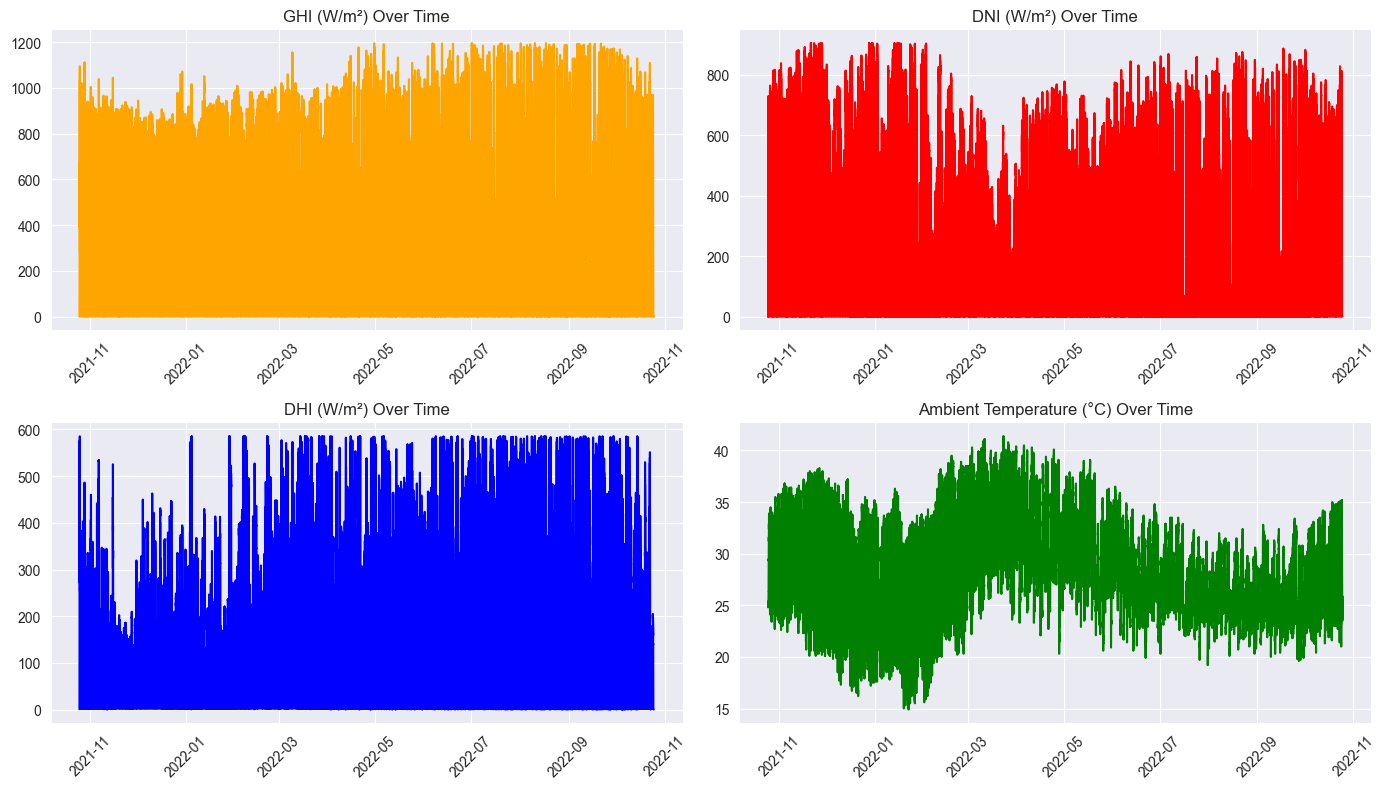

In [11]:
plt.figure(figsize=(14, 8))

# Plot GHI (Global Horizontal Irradiance)
plt.subplot(2, 2, 1)
plt.plot(daytime_df.index, daytime_df['GHI'], color='orange', label='GHI')
plt.title('GHI (W/m²) Over Time')
plt.xticks(rotation=45)
plt.grid(True)

# Plot DNI (Direct Normal Irradiance)
plt.subplot(2, 2, 2)
plt.plot(daytime_df.index, daytime_df['DNI'], color='red', label='DNI')
plt.title('DNI (W/m²) Over Time')
plt.xticks(rotation=45)
plt.grid(True)

# Plot DHI (Diffuse Horizontal Irradiance)
plt.subplot(2, 2, 3)
plt.plot(daytime_df.index, daytime_df['DHI'], color='blue', label='DHI')
plt.title('DHI (W/m²) Over Time')
plt.xticks(rotation=45)
plt.grid(True)

# Plot Tamb (Ambient Temperature)
plt.subplot(2, 2, 4)
plt.plot(df.index, df['Tamb'], color='green', label='Tamb')
plt.title('Ambient Temperature (°C) Over Time')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

3. Bar Charts: Aggregated Trends


<Figure size 1200x600 with 0 Axes>

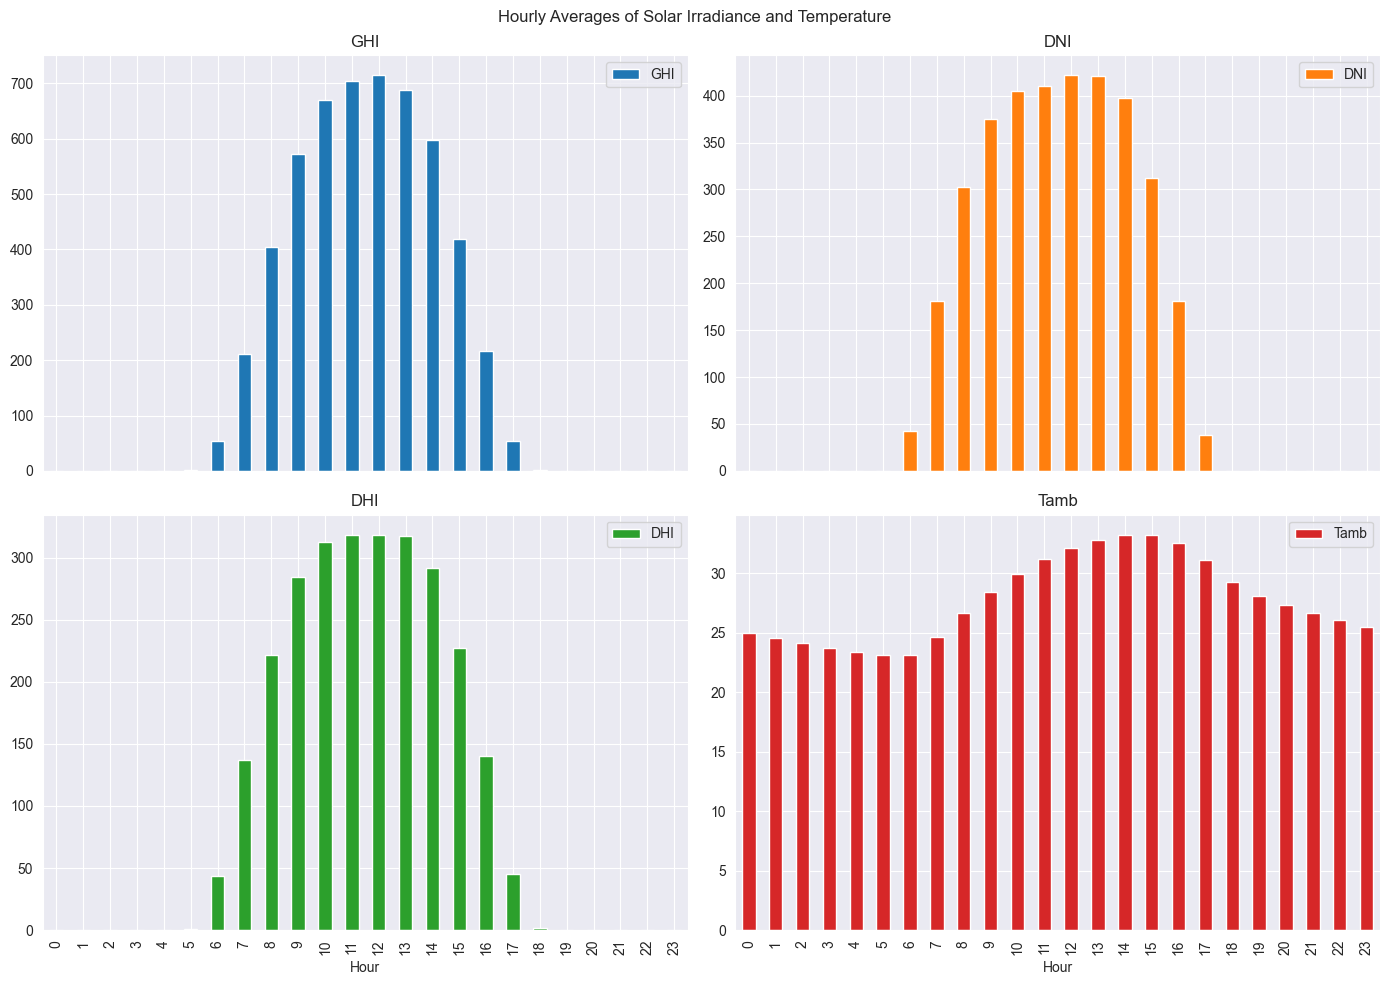

In [12]:
# Extract hour from Timestamp
df['Hour'] = df.index.hour

# Group by hour and compute mean
hourly_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot
plt.figure(figsize=(12, 6))
hourly_avg.plot(kind='bar', subplots=True, layout=(2, 2), figsize=(14, 10))
plt.suptitle('Hourly Averages of Solar Irradiance and Temperature')
plt.tight_layout()
plt.show()

4. Anomaly Detection

Unusual Spikes in Irradiance


In [13]:
# Identify sudden GHI spikes (e.g., sensor errors)
ghi_std = df['GHI'].std()
anomalies = df[df['GHI'] > (df['GHI'].mean() + 3 * ghi_std)]
print(f"Found {len(anomalies)} GHI anomalies (3σ threshold):")
print(anomalies[['GHI', 'DNI', 'DHI']].head())

Found 194 GHI anomalies (3σ threshold):
                        GHI    DNI    DHI
Timestamp                                
2022-04-20 11:35:00  1170.0  745.6  411.5
2022-04-20 11:36:00  1176.0  745.2  417.5
2022-04-20 12:14:00  1177.0  740.8  419.3
2022-04-20 12:15:00  1169.0  738.2  413.1
2022-04-30 10:35:00  1176.0  666.4  537.8


Temperature vs. Irradiance Mismatch


In [14]:
# Check if high GHI but low Tamb (unusual)
suspicious = df[(df['GHI'] > 800) & (df['Tamb'] < 25)]
print(f"Found {len(suspicious)} cases of high GHI but low Tamb:")
print(suspicious[['GHI', 'Tamb']])

Found 69 cases of high GHI but low Tamb:
                       GHI  Tamb
Timestamp                       
2022-07-01 10:00:00  814.0  22.5
2022-07-01 10:01:00  854.0  22.6
2022-07-01 10:02:00  923.0  22.6
2022-07-01 10:03:00  875.0  22.6
2022-07-01 10:19:00  892.0  23.2
...                    ...   ...
2022-09-19 08:49:00  846.0  24.2
2022-09-19 09:10:00  808.0  24.6
2022-09-19 09:11:00  864.0  24.7
2022-09-19 09:15:00  882.0  24.8
2022-09-19 09:16:00  809.0  24.8

[69 rows x 2 columns]


Cleaning Impact

Comparing Module Temperatures (ModA & ModB) Before vs. After Cleaning

Mark Cleaning Flags


In [15]:
# --- Detect outliers (Z-score > 3) ---
numeric_cols = ['ModA', 'ModB']
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers = (z_scores > 3).any(axis=1)

# Add a 'Cleaning_Flag' column
df['Cleaning_Flag'] = np.where(outliers, 'Modified', 'Original')

Step 2: Plot Pre-Clean vs. Post-Clean Averages

Compare the mean ModA and ModB for original vs. modified rows.




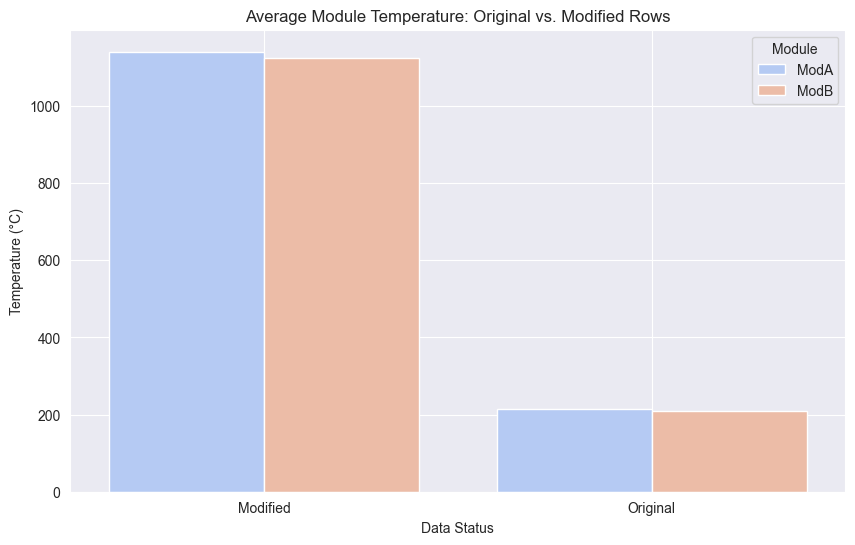

In [16]:
# Group by cleaning flag and compute mean
grouped = df.groupby('Cleaning_Flag')[['ModA', 'ModB']].mean().reset_index()

# Melt for Seaborn plotting
melted = pd.melt(grouped, id_vars='Cleaning_Flag', var_name='Module', value_name='Temperature')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x='Cleaning_Flag', y='Temperature', hue='Module', palette='coolwarm')
plt.title('Average Module Temperature: Original vs. Modified Rows')
plt.ylabel('Temperature (°C)')
plt.xlabel('Data Status')
plt.grid(True)
plt.show()

Step 3: Boxplot for Distribution Comparison

Visualize the spread of temperatures before and after cleaning.



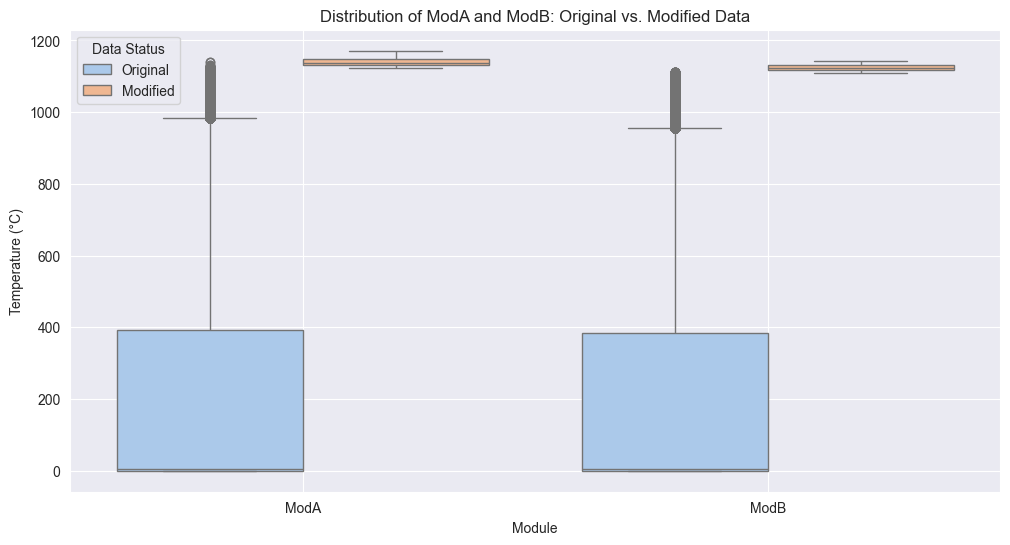

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=pd.melt(df, id_vars='Cleaning_Flag', value_vars=['ModA', 'ModB']),
    x='variable',
    y='value',
    hue='Cleaning_Flag',
    palette='pastel'
)
plt.title('Distribution of ModA and ModB: Original vs. Modified Data')
plt.xlabel('Module')
plt.ylabel('Temperature (°C)')
plt.legend(title='Data Status')
plt.grid(True)
plt.show()

Step 4: Summary Table


In [18]:
summary = df.groupby('Cleaning_Flag').agg({
    'ModA': ['mean', 'std', 'count'],
    'ModB': ['mean', 'std', 'count']
})
print(summary)

                      ModA                             ModB              \
                      mean         std   count         mean         std   
Cleaning_Flag                                                             
Modified       1140.072642   10.014766     106  1124.500000    8.624715   
Original        215.397751  310.127517  525494   209.157217  300.939262   

                       
                count  
Cleaning_Flag          
Modified          106  
Original       525494  


Correlation & Relationship Analysis
1. Heatmap of Correlations

Visualize relationships between solar irradiance (GHI, DNI, DHI) and module temperatures (TModA, TModB).




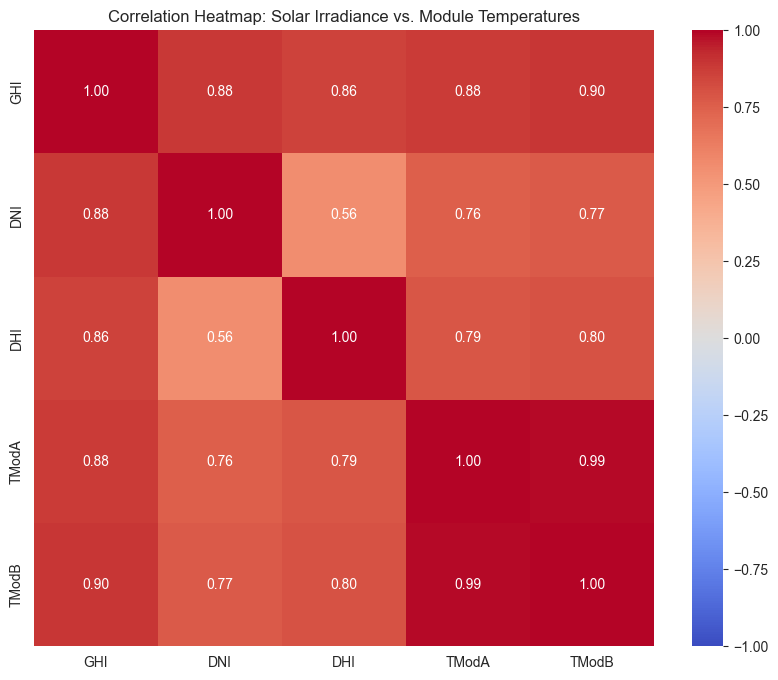

In [19]:
# Select key columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Heatmap: Solar Irradiance vs. Module Temperatures')
plt.show()

Wind & Distribution Analysis
1. Wind Speed (WS) & Gust (WSgust) Analysis

A. Distribution Plots


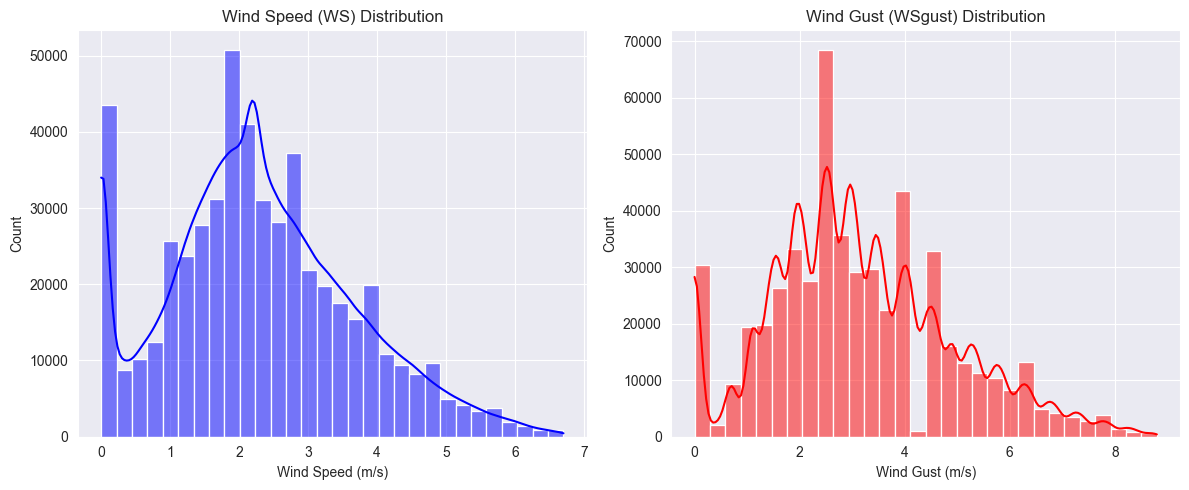

In [20]:
plt.figure(figsize=(12, 5))

# Wind Speed (WS)
plt.subplot(1, 2, 1)
sns.histplot(df['WS'], bins=30, kde=True, color='blue')
plt.title('Wind Speed (WS) Distribution')
plt.xlabel('Wind Speed (m/s)')
plt.grid(True)

# Wind Gust (WSgust)
plt.subplot(1, 2, 2)
sns.histplot(df['WSgust'], bins=30, kde=True, color='red')
plt.title('Wind Gust (WSgust) Distribution')
plt.xlabel('Wind Gust (m/s)')
plt.grid(True)

plt.tight_layout()
plt.show()

B. Boxplot Comparison


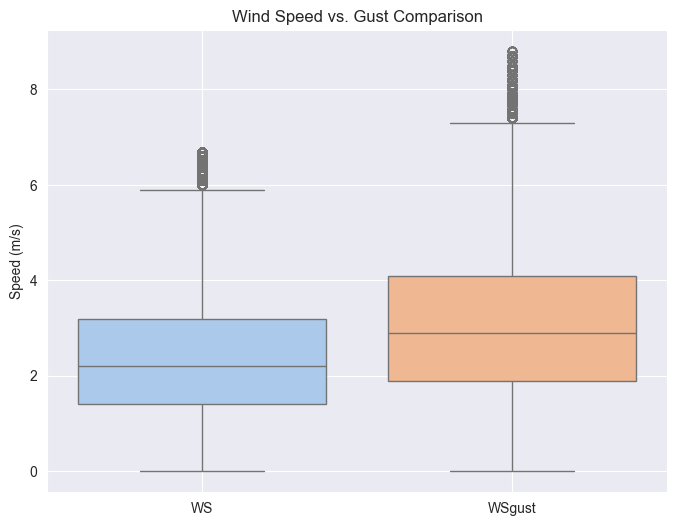

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['WS', 'WSgust']], palette='pastel')
plt.title('Wind Speed vs. Gust Comparison')
plt.ylabel('Speed (m/s)')
plt.grid(True)
plt.show()

2. Wind Direction (WD) Analysis

A. Circular Histogram (Polar Plot)


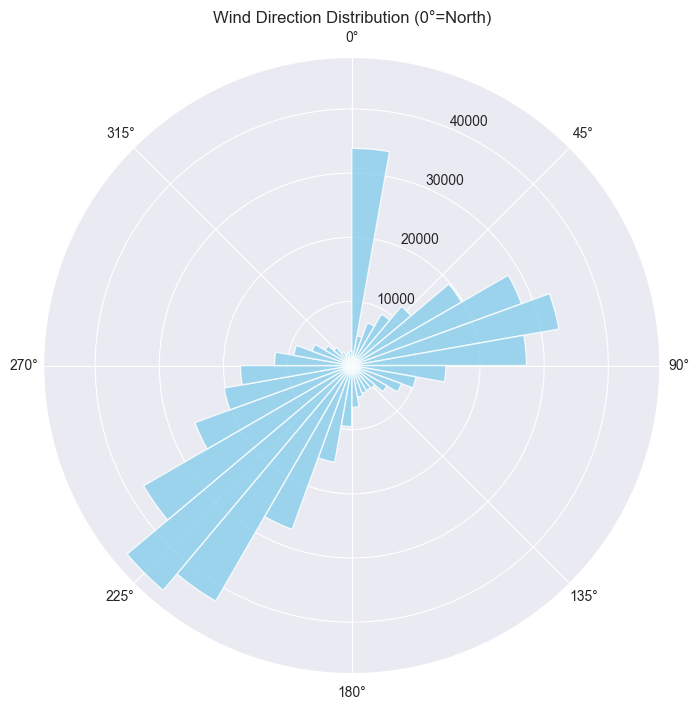

In [22]:
from matplotlib.projections import PolarAxes

# Convert degrees to radians
wd_rad = np.deg2rad(df['WD'])

# Plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')
ax.set_theta_zero_location('N')  # 0° = North
ax.set_theta_direction(-1)       # Clockwise
ax.hist(wd_rad, bins=36, color='skyblue', alpha=0.8)
plt.title('Wind Direction Distribution (0°=North)')
plt.show()

B. Wind Rose Diagram


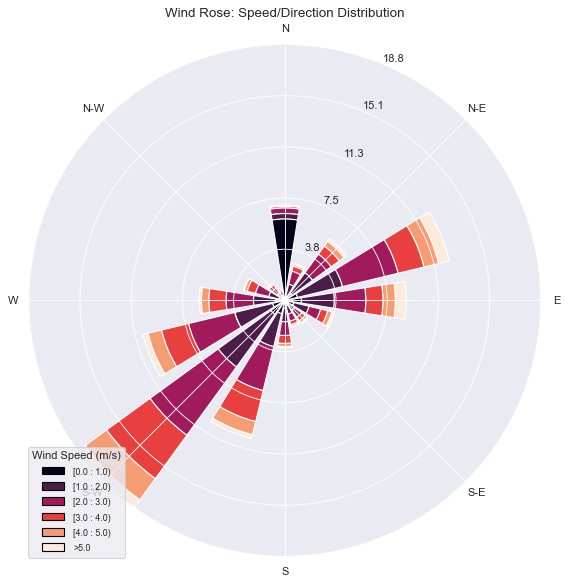

In [23]:
from windrose import WindroseAxes  # Install with: pip install windrose

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], bins=np.arange(0, 6, 1), normed=True)
ax.set_legend(title='Wind Speed (m/s)')
plt.title('Wind Rose: Speed/Direction Distribution')
plt.show()

3. Wind vs. Solar Irradiance (GHI)

A. Wind Speed vs. GHI Scatter


C:\Users\getde\Desktop\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


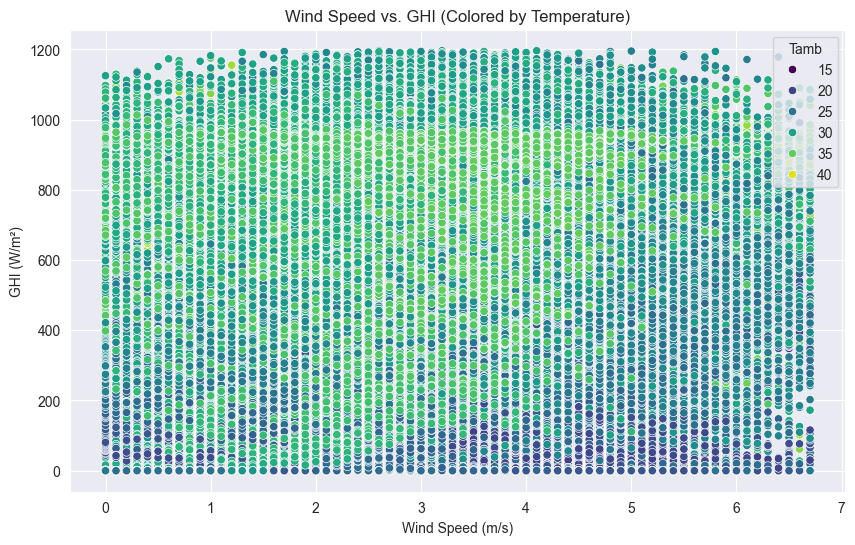

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='WS', y='GHI', hue='Tamb', palette='viridis')
plt.title('Wind Speed vs. GHI (Colored by Temperature)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()

B. Wind Direction Impact on GHI


In [25]:
# Create 45° bins (0°=N, 45°=NE, etc.) and labels
bins = np.arange(0, 361, 45)
labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']

# Add binned column to DataFrame
df['WD_binned'] = pd.cut(
    df['WD'],
    bins=bins,
    labels=labels,
    right=False
)

# Handle the 360° edge case (e.g., 360° should be grouped with 0°=N)
df['WD_binned'] = df['WD_binned'].cat.add_categories(['N'])
df.loc[df['WD'] == 360, 'WD_binned'] = 'N'

ValueError: new categories must not include old categories: {'N'}

C:\Users\getde\AppData\Local\Temp\ipykernel_10308\2734814295.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='WD_binned', y='GHI', palette='coolwarm')  # Bin WD into 45° segments


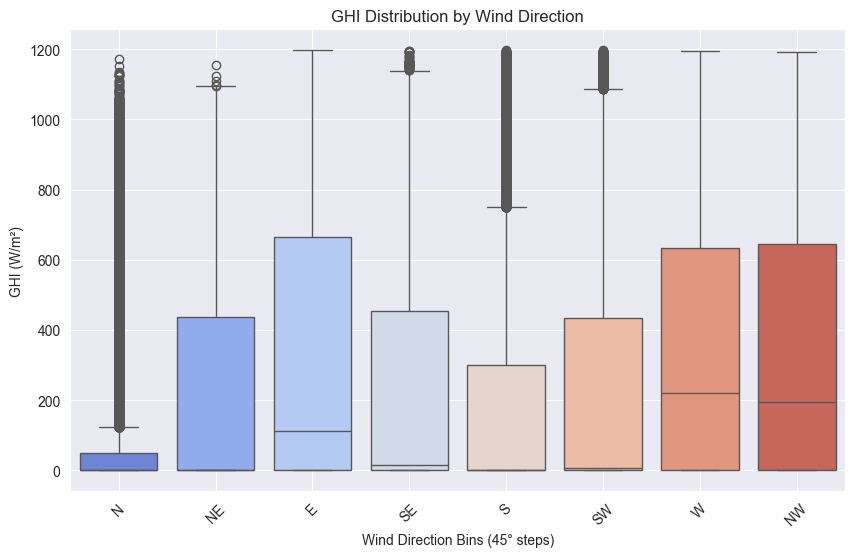

In [26]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='WD_binned', y='GHI', palette='coolwarm')  # Bin WD into 45° segments
plt.title('GHI Distribution by Wind Direction')
plt.xlabel('Wind Direction Bins (45° steps)')
plt.ylabel('GHI (W/m²)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [27]:
print(df[['WD', 'WD_binned']].drop_duplicates().sort_values('WD'))


                        WD WD_binned
Timestamp                           
2021-10-25 01:04:00    0.0         N
2021-10-29 13:18:00    0.1         N
2021-11-08 14:33:00    0.2         N
2021-10-25 15:12:00    0.3         N
2021-11-01 16:43:00    0.4         N
...                    ...       ...
2021-11-09 16:55:00  359.6        NW
2021-11-08 16:32:00  359.7        NW
2021-10-29 10:34:00  359.8        NW
2021-11-12 19:25:00  359.9        NW
2021-10-25 12:42:00  360.0       NaN

[3601 rows x 2 columns]


4. Statistical Summary

Wind Metrics


In [28]:
wind_stats = df[['WS', 'WSgust', 'WD']].describe()
print(wind_stats)

                  WS         WSgust             WD
count  525600.000000  525600.000000  525600.000000
mean        2.310192       3.149748     161.741845
std         1.365885       1.746922      91.877217
min         0.000000       0.000000       0.000000
25%         1.400000       1.900000      74.800000
50%         2.200000       2.900000     199.100000
75%         3.200000       4.100000     233.500000
max         6.700000       8.800000     360.000000


Correlation with GHI


In [29]:
wind_ghi_corr = df[['WS', 'WSgust', 'WD', 'GHI']].corr()['GHI'].sort_values()
print(wind_ghi_corr)

WD        0.097515
WS        0.437493
WSgust    0.465578
GHI       1.000000
Name: GHI, dtype: float64


Temperature Analysis

 Bubble chart to visualize the relationship between GHI (Global Horizontal Irradiance) and Tamb (Ambient Temperature), with bubble size representing RH (Relative Humidity) or BP (Barometric Pressure).

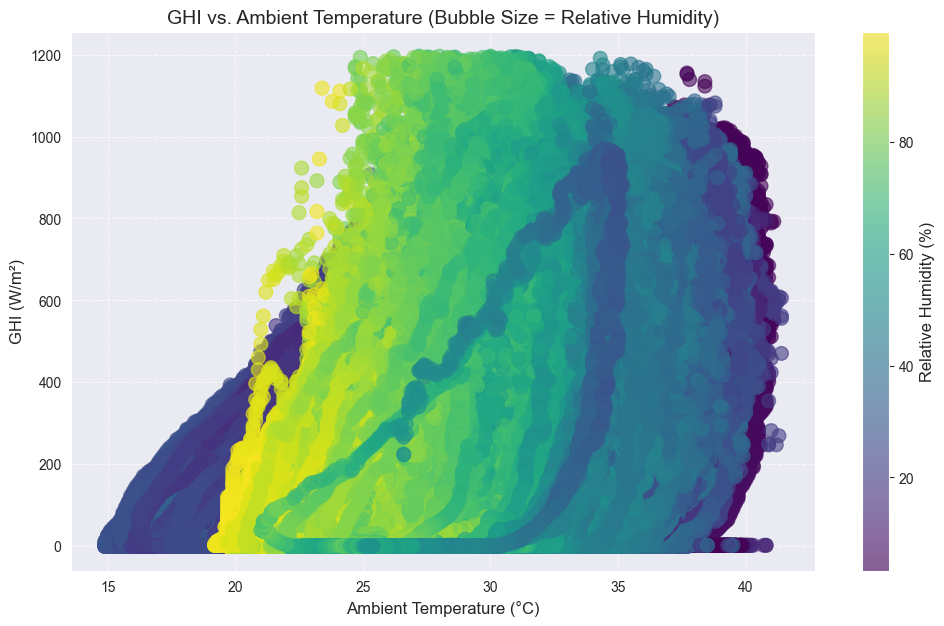

In [30]:
# Filter out negative GHI values (invalid/missing data)
df = df[df['GHI'] >= 0]

# Create figure
plt.figure(figsize=(12, 7))

# Scatter plot: GHI vs. Tamb, bubble size = RH
scatter = plt.scatter(
    x=df['Tamb'],
    y=df['GHI'],
    s=df['BP']/10,  # Scale BP for visibility
    alpha=0.6,
    c=df['RH'],     # Still color by RH for extra dimension
    cmap='viridis'
)

# Labels and title
plt.xlabel("Ambient Temperature (°C)", fontsize=12)
plt.ylabel("GHI (W/m²)", fontsize=12)
plt.title("GHI vs. Ambient Temperature (Bubble Size = Relative Humidity)", fontsize=14)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Relative Humidity (%)", fontsize=12)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()